# PyTorch Linear Regression


* [Acknowledgements](#ackw)
* [Overview](#overview) 
* [PyTorch linear regression](#ekf)
    * [PyTorch 1D linear regression](#test_case_1) 
    * [The class ```Linear```](#test_case_2)
    * [Training](#test_case_3)
    * [Application](#test_case_4)
* [References](#refs)

## <a name="ackw"></a> Acknowledgements

The Python code for this notebook is edited for the course <a href="https://courses.edx.org/courses/course-v1:IBM+DL0110EN+3T2018/course/"> Deep Learning with Python and PyTorch</a> on <a href="https://www.edx.org/">edX</a>.

## <a name="overview"></a> Overview

In this notebook, we will construct a <a href="https://en.wikipedia.org/wiki/Linear_regression">linear regression</a> model using PyTorch. 

## <a name="ekf"></a> PyTorch linear regression

Linear regression, as the name suggests, fits a linear model in the given dataset. Concretely, when doing 1D linear regression, i.e. using only one feature,  the model looks like the following 

$$\hat{y} = wx +b$$

where $\hat{y}$ is the predicted output for the given input $x$. The model thus, is fully characterized given the line slope $w$ and the interseption or bias term $b$. When we train the model our objective is to get an estimate of both $w$ and $b$.

There is an analytical solution for 1D linear regression:

## Analytical Solution Linear Regression

The model can be easily extended to more than one features by attaching a weight to every feature. Overall, this entails the following model

$$\hat{y} = w_1x_1 + w_2x_2 + \cdots + w_mx_m + w_0$$

This is not very different than the model shown above. We can write this more compactly using vectors:

$$\hat{y} = w_1x_1 + w_2x_2 + \cdots + w_mx_m + w_0 = \sum_{i=0}^m w_ix_i = \mathbf{w}^T\mathbf{x}$$

where now the weights vector $\mathbf{w}$ contains the weight $w_0$ and the vector is augmented with an extra one.

### <a name="test_case_1"></a> PyTorch 1D linear regression


In [1]:
import torch

Let's first construct the following model

$$y = -1.0 + 2x$$

In [11]:
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

We want to make predictions based on this model. This is typically called the ```forward``` in PyTorch

In [12]:
def forward(x):
    return w*x + b

In [13]:
x = torch.tensor([[1.0]])

In [14]:
yhat = forward(x)
print(yhat)

tensor([[1.]], grad_fn=<AddBackward0>)


The same can be done for multiple samples

In [15]:
x = torch.tensor([[1.0], [2.0]])

In [18]:
yhat = forward(x)
print(yhat)

tensor([[1.],
        [3.]], grad_fn=<SliceBackward>)


###  <a name="test_case_2"></a> The class ```Linear```

In [19]:
from torch.nn import Linear

Using the ```Linear``` class we can construct a linear model:

In [20]:
model = Linear(in_features=1, out_features=1)

Let's try to make a prediction with the model

In [21]:
yhat = model(x)
print(yhat)

tensor([[0.0735],
        [0.8554]], grad_fn=<AddmmBackward>)


Ok we got something out but how are the parameters of the model set? When we construct a ```Linear``` object the parameters are randomly initialized. We can use ```torch.manual_seed(1)``` so that we get the same results every time we execute the code.

In [22]:
torch.manual_seed(1)

In [23]:
model = Linear(in_features=1, out_features=1)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


### <a name="test_case_3"></a> Training

### <a name="test_case_4"></a>  Application

In [31]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

Let's see an application. We create values from -4 to 4 with a slope -4

In [26]:
import matplotlib.pyplot as plt

In [25]:
X = torch.arange(-4, 4, 0.1).view(-1, 1)
f = -4 * X

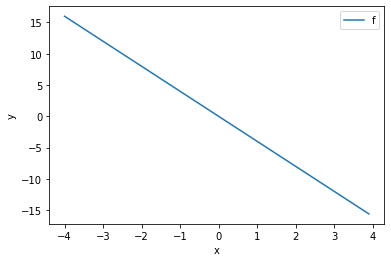

In [27]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use ```torch.randn(X.size())``` to generate Gaussian noise that is the same size as ```X``` and has a standard deviation of 0.1.


In [28]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

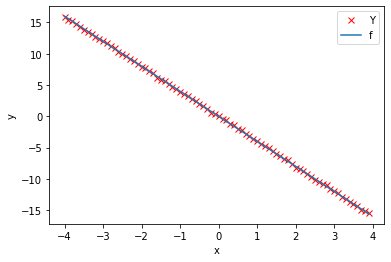

In [29]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
# Create forward function for prediction

def forward(x):
    return w * x

In [33]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [34]:
# Create Learning Rate and an empty list to record the loss for each iteration
lr = 0.1
LOSS = []

In [35]:
w = torch.tensor(-10.0, requires_grad = True)

In [36]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [37]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

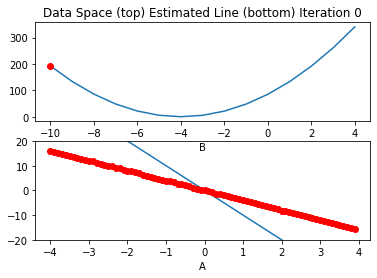

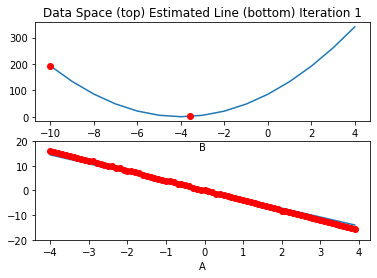

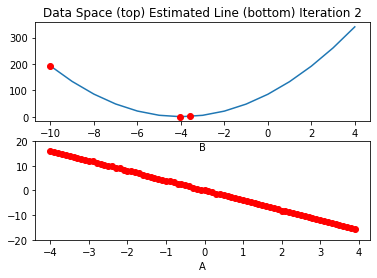

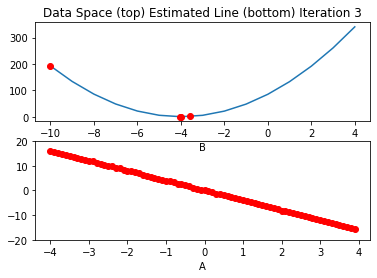

<Figure size 432x288 with 0 Axes>

In [38]:
train_model(4)

Text(23.875, 0.5, 'Cost')

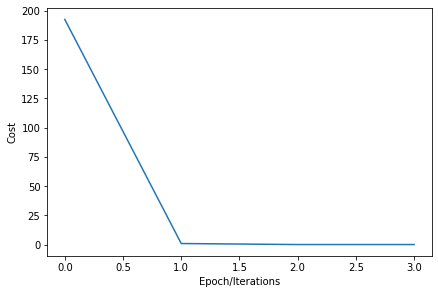

In [39]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

## <a name="refs"></a> References

1. Eli Stevens, Luca Antiga, Thomas Viehmann, ```Deep Learning with PyTorch```, Manning Publications.
2. <a href="https://pytorch.org/tutorials/">PyTorch tutorials</a>
3. <a href="https://courses.edx.org/courses/course-v1:IBM+DL0110EN+3T2018/course/"> Deep Learning with Python and PyTorch</a>